In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')

In [2]:
불법유턴 = pd.read_excel('./data/부산_신고데이터/불법유턴_busan.xlsx')
불법좌회전 = pd.read_excel('./data/부산_신고데이터/불법좌회전_busan.xlsx')
신호위반 = pd.read_excel('./data/부산_신고데이터/신호위반_busan.xlsx')
중앙선침범 = pd.read_excel('./data/부산_신고데이터/중앙선침범_busan.xlsx')
진로변경위반 = pd.read_excel('./data/부산_신고데이터/진로변경방법위반_busan.xlsx')

In [3]:
# 시군구별_전체신고건수_통합 (숫자로 다른 데이터(인구, 통행량 등)와 비교하기 위해서)

불법유턴_시군구별_count=불법유턴['시군구'].value_counts().sort_index()
불법좌회전_시군구별_count=불법좌회전['시군구'].value_counts().sort_index()
신호위반_시군구별_count=신호위반['시군구'].value_counts().sort_index()
중앙선침범_시군구별_count=중앙선침범['시군구'].value_counts().sort_index()
진로변경위반_시군구별_count=진로변경위반['시군구'].value_counts().sort_index()

tmp=[불법유턴_시군구별_count.reset_index(),
     불법좌회전_시군구별_count.reset_index(),
     신호위반_시군구별_count.reset_index(),
     중앙선침범_시군구별_count.reset_index(),
     진로변경위반_시군구별_count.reset_index(),
     ]
tmp_name=['불법유턴_시군구별_count',
     '불법좌회전_시군구별_count',
     '신호위반_시군구별_count',
     '중앙선침범_시군구별_count',
     '진로변경위반_시군구별_count',
     ]

common = tmp[0]
for i in range(1, len(tmp)):
    common = common.merge(tmp[i], on='시군구', suffixes=('', f'_{tmp_name[i]}'))

시군구별_전체신고건수_통합=common


시군구별_전체신고건수_통합.rename(columns={'count': tmp_name[0],
                               'count_불법좌회전_시군구별_count': tmp_name[1],
                               'count_신호위반_시군구별_count': tmp_name[2],
                               'count_중앙선침범_시군구별_count': tmp_name[3],
                               'count_진로변경위반_시군구별_count': tmp_name[4],
                               }, inplace=True)

시군구별_전체신고건수_통합


,시군구,불법유턴_시군구별_count,불법좌회전_시군구별_count,신호위반_시군구별_count,중앙선침범_시군구별_count,진로변경위반_시군구별_count
0,강서구,149,785,913,209,493
1,금정구,89,397,341,89,479
2,기장군,79,369,411,115,365
3,남구,204,228,327,81,555
4,동구,30,62,104,22,159
5,동래구,49,228,298,104,272
6,부산진구,155,396,622,210,629
7,북구,60,180,274,112,419
8,사상구,119,386,356,172,475
9,사하구,113,366,477,241,729


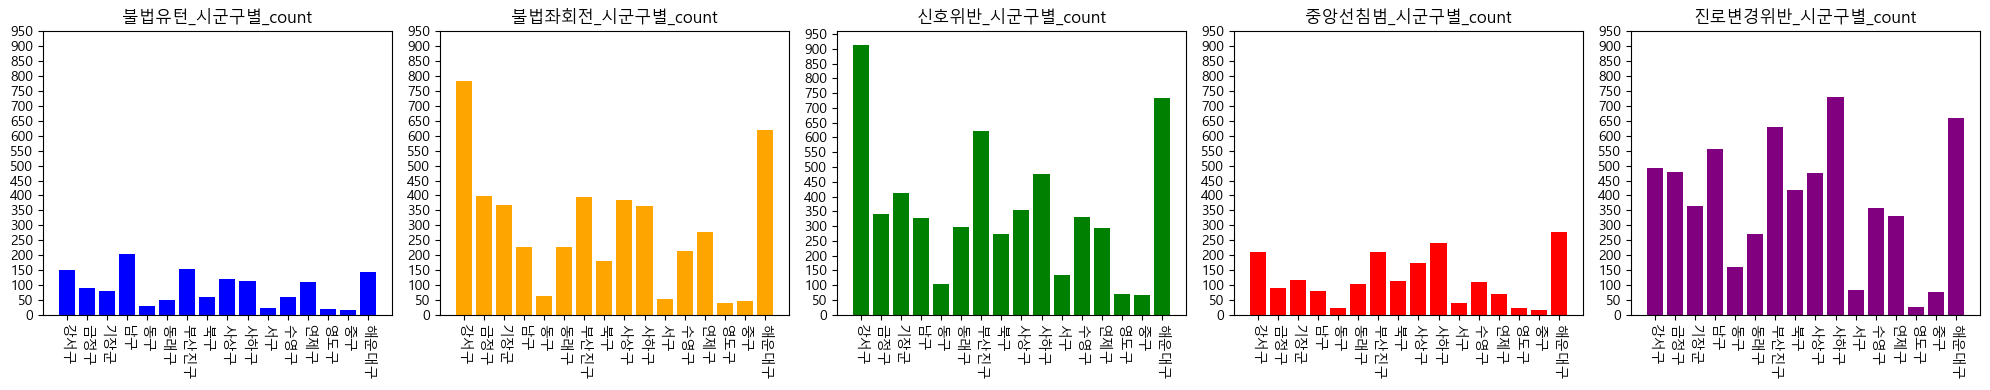

In [4]:
# 신고별 막대그래프

plt.figure(figsize=(20,4))
colors = ['빈값','blue', 'orange','green', 'red', 'purple']


for i in range(1, len(시군구별_전체신고건수_통합.columns)):
    x = 시군구별_전체신고건수_통합.iloc[:,0]
    y = 시군구별_전체신고건수_통합.iloc[:,i]

    plt.subplot(1, 5, i)
    plt.bar(x=x,height=y,color=colors[i])
    plt.xticks(rotation=270)
    plt.yticks(np.arange(0, 1000, 50))   #max(y)+1
    plt.title(f'{시군구별_전체신고건수_통합.columns[i]}')
plt.tight_layout()
plt.show()

# 불법좌회전과 신호위반이 상당히 유사한 형태를 가지고있다.

In [5]:
# 신고건소로 보는 각 신고들의 통계값
시군구별_전체신고건수_통합.describe()

# 신고건수로 보는 각 신고들간의 상관성
시군구별_전체신고건수_통합.iloc[:, 1:].corr()

# => 불법좌회전과 신호위반이 시군구별 신고건수로 봤을 때 상당히 유사하다는 것을 다시 한 번 확인할 수 있다.

,불법유턴_시군구별_count,불법좌회전_시군구별_count,신호위반_시군구별_count,중앙선침범_시군구별_count,진로변경위반_시군구별_count
불법유턴_시군구별_count,1.000000,0.700232,0.728508,0.658983,0.837987
불법좌회전_시군구별_count,0.700232,1.000000,0.960601,0.833238,0.737909
신호위반_시군구별_count,0.728508,0.960601,1.000000,0.880740,0.769481
중앙선침범_시군구별_count,0.658983,0.833238,0.880740,1.000000,0.871584
진로변경위반_시군구별_count,0.837987,0.737909,0.769481,0.871584,1.000000


### 시군구별_전체신고건수 

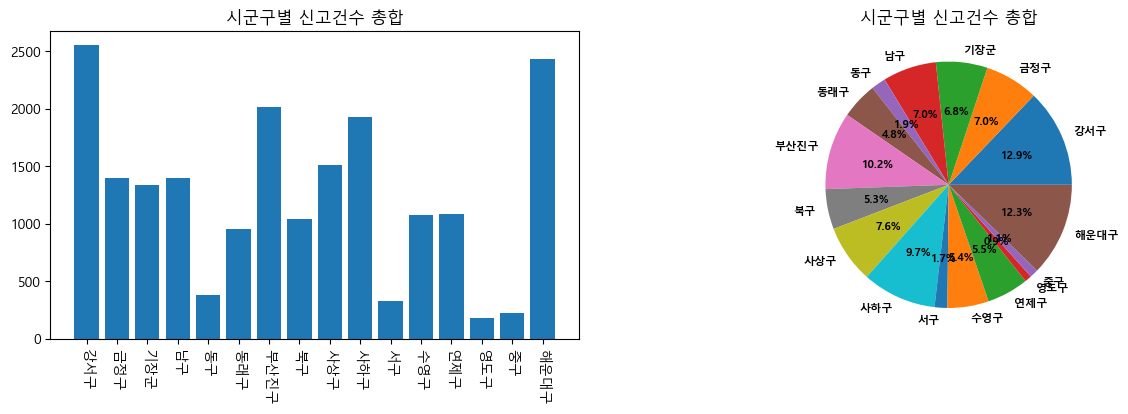

In [6]:
# 신고건수 총합 막대그래프

불법유턴_시군구별_count=불법유턴['시군구'].value_counts()
불법좌회전_시군구별_count=불법좌회전['시군구'].value_counts()
신호위반_시군구별_count=신호위반['시군구'].value_counts()
중앙선침범_시군구별_count=중앙선침범['시군구'].value_counts()
진로변경위반_시군구별_count=진로변경위반['시군구'].value_counts()

tmp_시군구별 = 불법유턴_시군구별_count+불법좌회전_시군구별_count+신호위반_시군구별_count+중앙선침범_시군구별_count+진로변경위반_시군구별_count
tmp_시군구별 = tmp_시군구별.dropna().to_frame().sort_index()


plt.figure(figsize=(15,4))

plt.subplot(1, 2, 1)
plt.bar(tmp_시군구별.index, tmp_시군구별['count']) # 여기서 y값은 tmp_시군구별.to_numpy().ravel() 의 결과
plt.xticks(rotation=270)    
plt.title('시군구별 신고건수 총합')


tmp_시군구별_1d=tmp_시군구별.to_numpy().ravel()
plt.subplot(1, 2, 2)

plt.pie(tmp_시군구별_1d,labels=tmp_시군구별.index,autopct='%1.1f%%',textprops={'fontsize': 8, 'fontweight': 'bold'})
plt.title('시군구별 신고건수 총합')
plt.show()

# 총계로 봤을 때 강서구, 해운대구, 부산진구, 사하구 순으로 신고건수가 많은 것을 알 수 있다.



### 인구통계 데이터

In [7]:
인구통계=pd.read_csv('./data/부산_수집데이터/부산광역시_주민등록인구통계_20221231.csv', encoding='cp949')
인구통계.sort_values(by='구군', inplace=True)

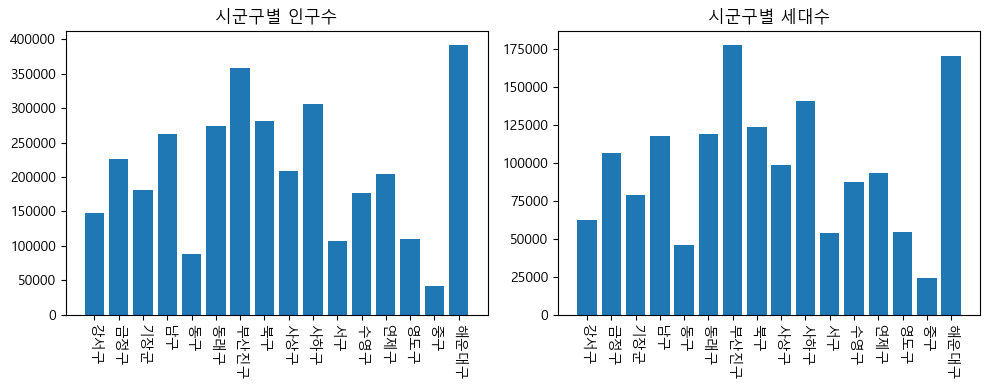

In [8]:
plt.figure(figsize=(10,4))


plt.subplot(1, 2, 1)
plt.bar(인구통계['구군'],인구통계['인구수(명)']) 
plt.xticks(rotation=270)  
plt.title('시군구별 인구수')

# plt.subplot(1, 3, 2)
# plt.bar(인구통계['구군'],인구통계['면적(제곱킬로미터)'])    
# plt.xticks(rotation=270)
# plt.title('시군구별 면적')

plt.subplot(1, 2, 2)
plt.bar(인구통계['구군'],인구통계['세대수(세대)'])      
plt.xticks(rotation=270)  
plt.title('시군구별 세대수')

plt.tight_layout()
plt.show()           

### 통행량 데이터

In [9]:
추정통행량_시군구별=pd.read_excel('./data/부산_수집데이터/시군구별 추정 통행량(2021).xlsx')

# 추정통행량_시군구별[0:16] 불필요한 행 제거
추정통행량_시군구별 = 추정통행량_시군구별[0:16]

추정통행량_시군구별.sort_values(by='시군구', inplace=True)


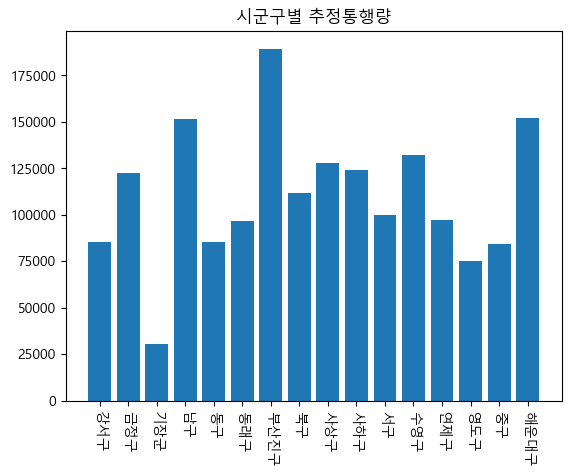

In [10]:
plt.bar(추정통행량_시군구별['시군구'],추정통행량_시군구별['통행량'])
plt.xticks(rotation=270)    # x축 이름 회전
plt.title('시군구별 추정통행량')
plt.show()

### CCTV 데이터

In [11]:
신호위반단속카메라=pd.read_excel('./data/부산_수집데이터/부산_신호위반단속카메라.xlsx')
# 신호위반단속카메라
신호위반단속카메라_시군구별_count = 신호위반단속카메라['시군구명'].value_counts().reset_index()
# 신호위반단속카메라_시군구별_count

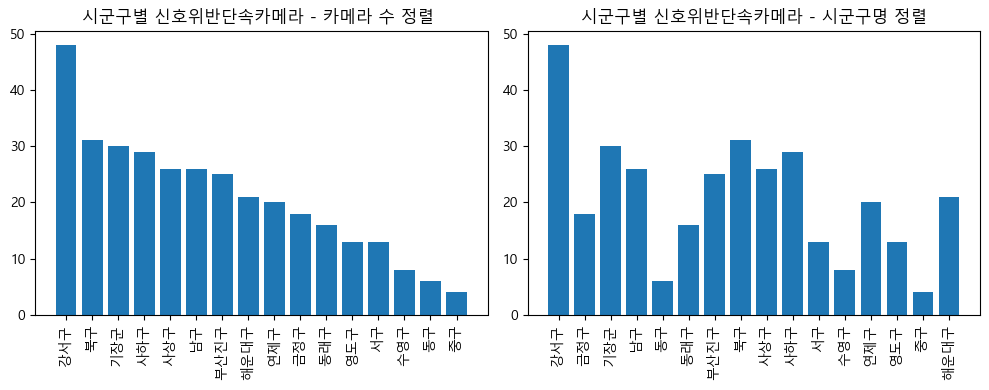

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(신호위반단속카메라_시군구별_count['시군구명'], 신호위반단속카메라_시군구별_count['count'])
plt.xticks(rotation=90)  # x축 이름 회전
plt.title('시군구별 신호위반단속카메라 - 카메라 수 정렬 ')

plt.subplot(1, 2, 2)
신호위반단속카메라_시군구별_count.sort_values(by='시군구명', inplace=True)
plt.bar(신호위반단속카메라_시군구별_count['시군구명'], 신호위반단속카메라_시군구별_count['count'])
plt.xticks(rotation=90)  # x축 이름 회전
plt.title('시군구별 신호위반단속카메라 - 시군구명 정렬')

plt.tight_layout()
plt.show()

## 시군구별_전체신고건수 (+통행량, CCTV)

In [13]:
# 시군구별_전체신고건수_추정통행량(각각의 신고들과 인구데이터/추정통행량 간의 상관성 파악을 위해)

common=common.merge(추정통행량_시군구별, on='시군구')
common.sort_values(by='통행량', ascending=False)

신호위반단속카메라=pd.read_excel('./data/부산_수집데이터/부산_신호위반단속카메라.xlsx')
신호위반단속카메라_시군구별_count = 신호위반단속카메라['시군구명'].value_counts().reset_index()
common = pd.merge(common,신호위반단속카메라_시군구별_count, left_on='시군구', right_on='시군구명', how='left')
common.drop(columns='시군구명', inplace=True)
common.rename(columns={'count': 'CCTV_count'}, inplace=True)

시군구별_전체신고건수_추정통행량=common
시군구별_전체신고건수_추정통행량

,시군구,불법유턴_시군구별_count,불법좌회전_시군구별_count,신호위반_시군구별_count,중앙선침범_시군구별_count,진로변경위반_시군구별_count,통행량,CCTV_count
0,강서구,149,785,913,209,493,85291,48
1,금정구,89,397,341,89,479,122479,18
2,기장군,79,369,411,115,365,30568,30
3,남구,204,228,327,81,555,151542,26
4,동구,30,62,104,22,159,85183,6
5,동래구,49,228,298,104,272,96685,16
6,부산진구,155,396,622,210,629,189317,25
7,북구,60,180,274,112,419,111742,31
8,사상구,119,386,356,172,475,127826,26
9,사하구,113,366,477,241,729,124040,29


In [14]:
# 상관 행렬을 계산
correlation_matrix = 시군구별_전체신고건수_추정통행량.iloc[:, 1:].corr()
correlation_matrix

,불법유턴_시군구별_count,불법좌회전_시군구별_count,신호위반_시군구별_count,중앙선침범_시군구별_count,진로변경위반_시군구별_count,통행량,CCTV_count
불법유턴_시군구별_count,1.000000,0.700232,0.728508,0.658983,0.837987,0.586910,0.654772
불법좌회전_시군구별_count,0.700232,1.000000,0.960601,0.833238,0.737909,0.236410,0.758441
신호위반_시군구별_count,0.728508,0.960601,1.000000,0.880740,0.769481,0.348079,0.759035
중앙선침범_시군구별_count,0.658983,0.833238,0.880740,1.000000,0.871584,0.494488,0.632723
진로변경위반_시군구별_count,0.837987,0.737909,0.769481,0.871584,1.000000,0.625447,0.628113
통행량,0.586910,0.236410,0.348079,0.494488,0.625447,1.000000,0.046065
CCTV_count,0.654772,0.758441,0.759035,0.632723,0.628113,0.046065,1.000000


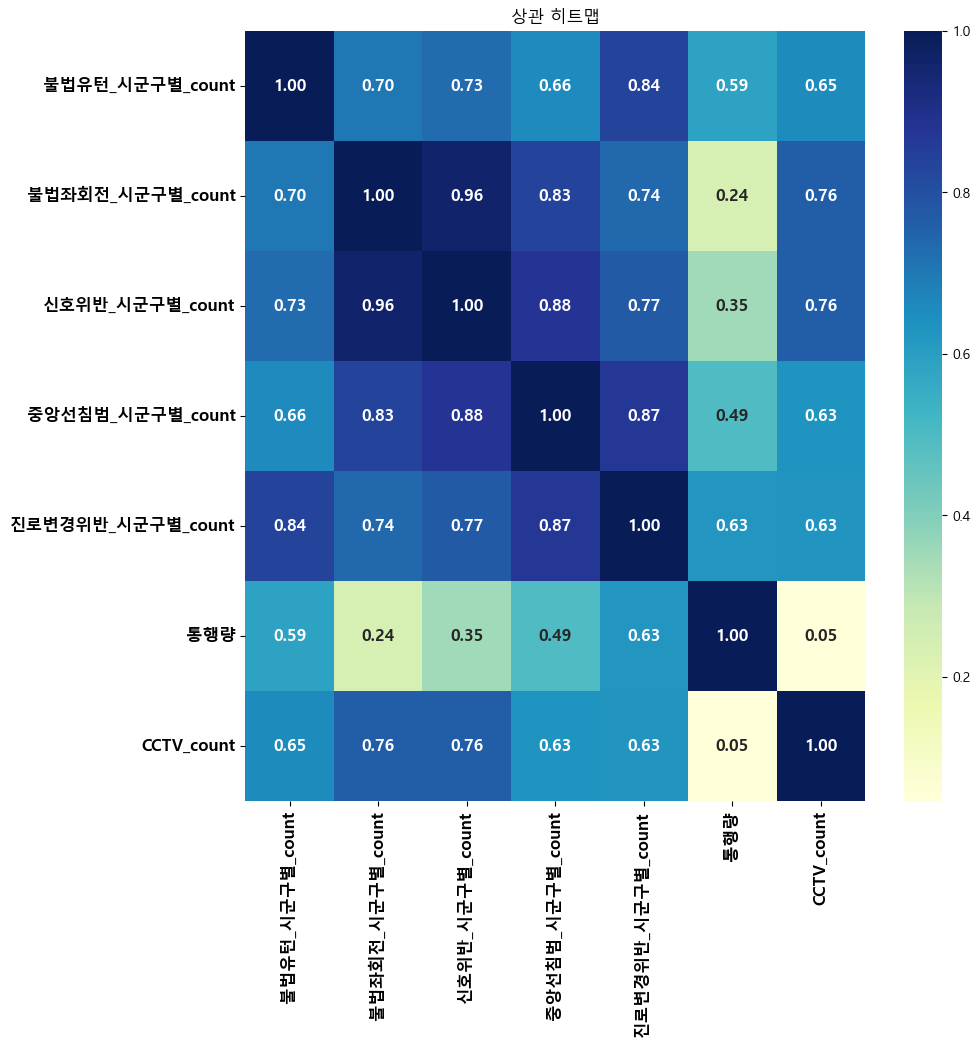

In [15]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler를 사용하여 열 표준화
columns_to_scale = ['불법유턴_시군구별_count', '불법좌회전_시군구별_count', '신호위반_시군구별_count',
                    '중앙선침범_시군구별_count', '진로변경위반_시군구별_count', '통행량', 'CCTV_count'] 
시군구별_전체신고건수_추정통행량[columns_to_scale] = scaler.fit_transform(시군구별_전체신고건수_추정통행량[columns_to_scale])

# 상관 행렬 생성
correlation_matrix = 시군구별_전체신고건수_추정통행량[columns_to_scale].corr()

# 히트맵 생성
plt.figure(figsize=(10, 10))
ax = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"size": 12, "weight": "bold"})
ax.set_xticklabels(ax.get_xticklabels(), size=12, weight="bold")
ax.set_yticklabels(ax.get_yticklabels(), size=12, weight="bold")
plt.title("상관 히트맵")
plt.show()

### 신고별_월별 시각화

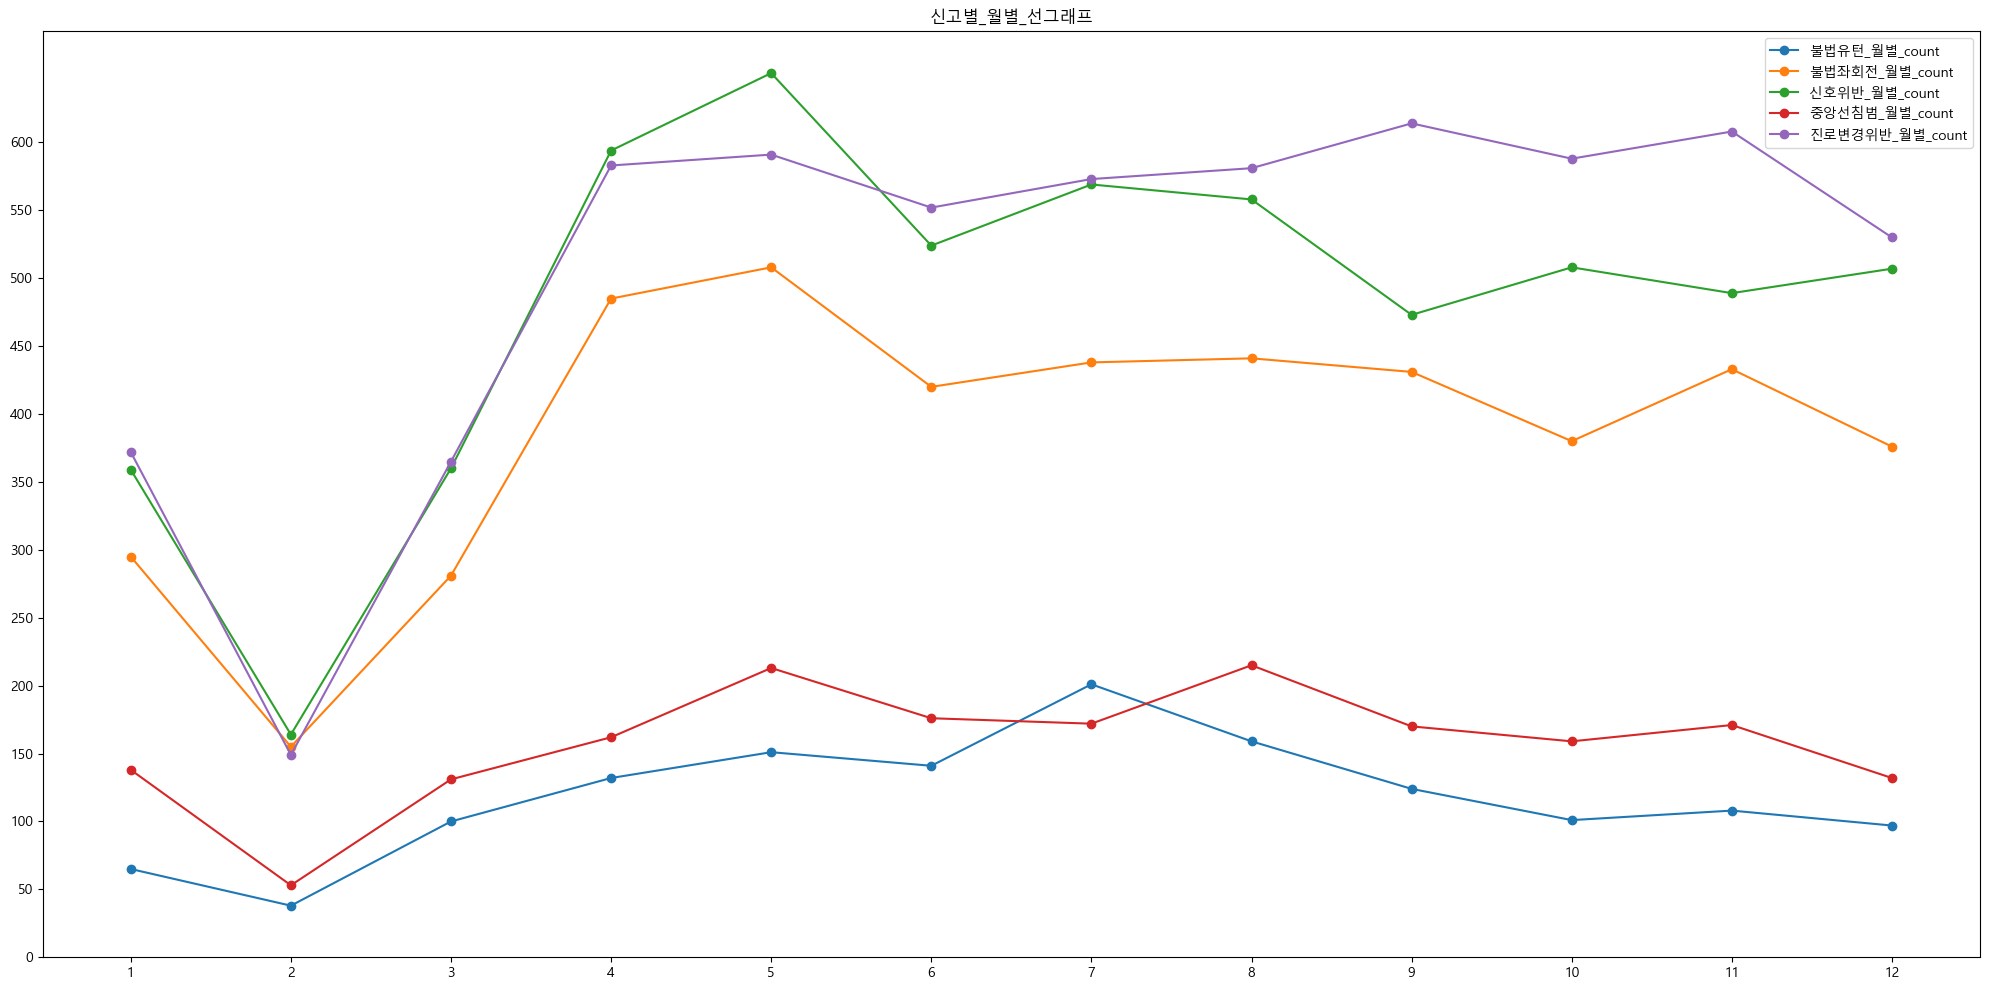

In [16]:
# 신고별 막대그래프
불법유턴_월별_count=불법유턴['월'].value_counts().to_frame().sort_values(by='월')
불법좌회전_월별_count=불법좌회전['월'].value_counts().to_frame().sort_values(by='월')
신호위반_월별_count=신호위반['월'].value_counts().to_frame().sort_values(by='월')
중앙선침범_월별_count=중앙선침범['월'].value_counts().to_frame().sort_values(by='월')
진로변경위반_월별_count=진로변경위반['월'].value_counts().to_frame().sort_values(by='월')



tmp=[불법유턴_월별_count,
     불법좌회전_월별_count,
     신호위반_월별_count,
     중앙선침범_월별_count,
     진로변경위반_월별_count,
     ]
tmp_name=['불법유턴_월별_count',
     '불법좌회전_월별_count',
     '신호위반_월별_count',
     '중앙선침범_월별_count',
     '진로변경위반_월별_count',
     ]


plt.figure(figsize=(20,10))

# 선그래프
for i in range(len(tmp)):
    x = tmp[i].index
    y = tmp[i]['count']

#     plt.subplot(1, len(tmp), i+1)
    plt.plot(x, y, marker='o', linestyle='-')
    plt.xticks(ticks=tmp[i].index)
    plt.yticks(np.arange(0, max(y)+1, 50))
    plt.title(f'{tmp_name[i]}')
    plt.legend(tmp_name)

plt.title('신고별_월별_선그래프')
plt.tight_layout()
plt.show()



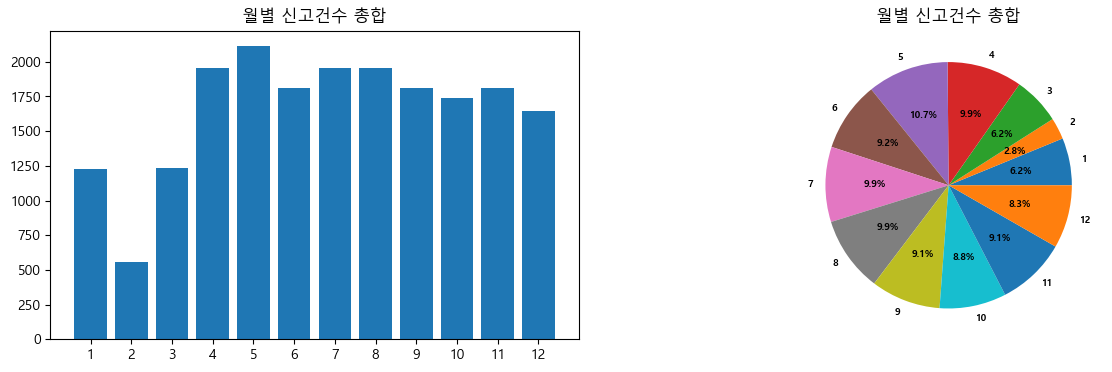

In [17]:
# 신고건수 월별 총합 막대그래프

불법유턴_월별_count=불법유턴['월'].value_counts()
불법좌회전_월별_count=불법좌회전['월'].value_counts()
신호위반_월별_count=신호위반['월'].value_counts()
중앙선침범_월별_count=중앙선침범['월'].value_counts()
진로변경위반_월별_count=진로변경위반['월'].value_counts()
tmp_월별 = 불법유턴_월별_count+불법좌회전_월별_count+신호위반_월별_count+중앙선침범_월별_count+진로변경위반_월별_count
tmp_월별 = tmp_월별.dropna().to_frame().sort_index()
tmp_월별

plt.figure(figsize=(15,4))

# 첫 번째 subplot (seaborn barplot)
plt.subplot(1, 2, 1)
plt.bar(tmp_월별.index, tmp_월별['count']) 
plt.xticks(tmp_월별.index)    
plt.title('월별 신고건수 총합')

tmp_월별_1d=tmp_월별.to_numpy().ravel()

# 두 번째 subplot (matplotlib pie plot)
plt.subplot(1, 2, 2)
plt.pie(tmp_월별_1d, labels=tmp_월별.index,
        autopct='%1.1f%%', textprops={'fontsize': 7, 'fontweight': 'bold'})
plt.title('월별 신고건수 총합')

plt.show()

## 월별 신고, 사고건수 비교 시각화 

In [25]:
시군구별_월별_교통사고_현황 = pd.read_excel('./data/부산_수집데이터/시군구별 월별 교통사고 현황_busan.xlsx')

월별_교통사고_현황=시군구별_월별_교통사고_현황.transpose()

월별_교통사고_현황=월별_교통사고_현황.drop(['시도','시군구','합계'])
월별_교통사고_현황=월별_교통사고_현황[0].to_frame()
월별_교통사고_현황



월별_교통사고_현황['종류']='사고'
월별_교통사고_현황=월별_교통사고_현황.rename(columns={0:'count'})
월별_교통사고_현황
for i in range(1,10):

    월별_교통사고_현황=월별_교통사고_현황.rename(index={f'0{i}월':f'{i}'})
월별_교통사고_현황=월별_교통사고_현황.rename(index={'10월':'10','11월':'11','12월':'12'})

tmp_월별['종류']='신고'
tmp_월별=tmp_월별.sort_index()
tmp_월별['count']=tmp_월별['count'].astype('object')
월별_신고_사고_현황=pd.concat([tmp_월별,월별_교통사고_현황])

월별_신고_사고_현황['월']=1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12

월별_신고_사고_현황

,count,종류,월
1,1229,신고,1
2,559,신고,2
3,1237,신고,3
4,1956,신고,4
5,2114,신고,5
6,1813,신고,6
7,1953,신고,7
8,1954,신고,8
9,1812,신고,9
10,1736,신고,10


c:\Python\python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vecto

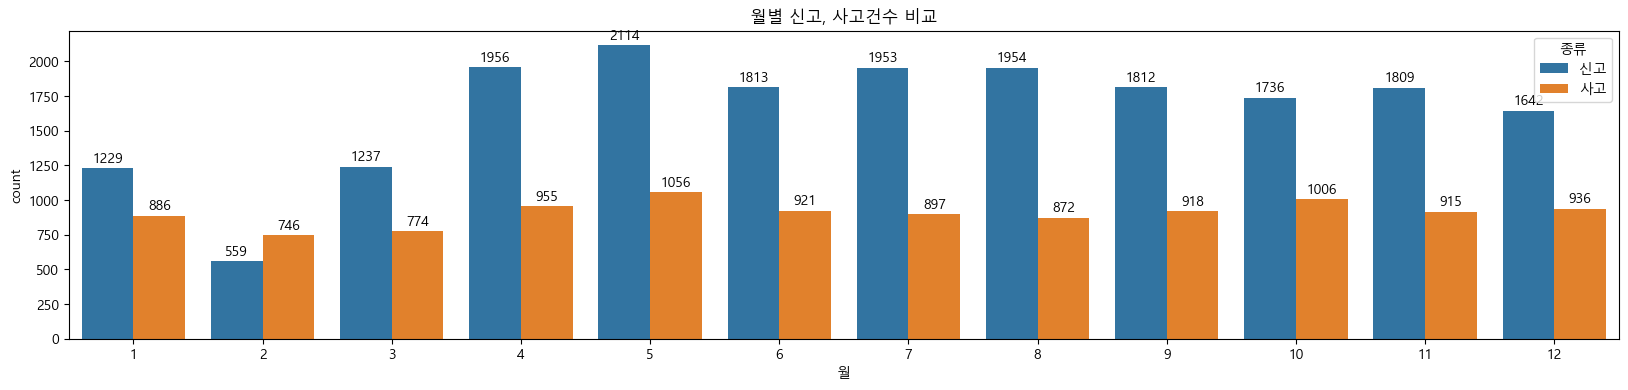

In [26]:
plt.figure(figsize=(20,4))

g=sns.barplot(x='월', y='count', hue='종류', data=월별_신고_사고_현황)
ax = g
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.title('월별 신고, 사고건수 비교')

plt.show()

## 솔루션 마지막에 추천할 요일, 시간

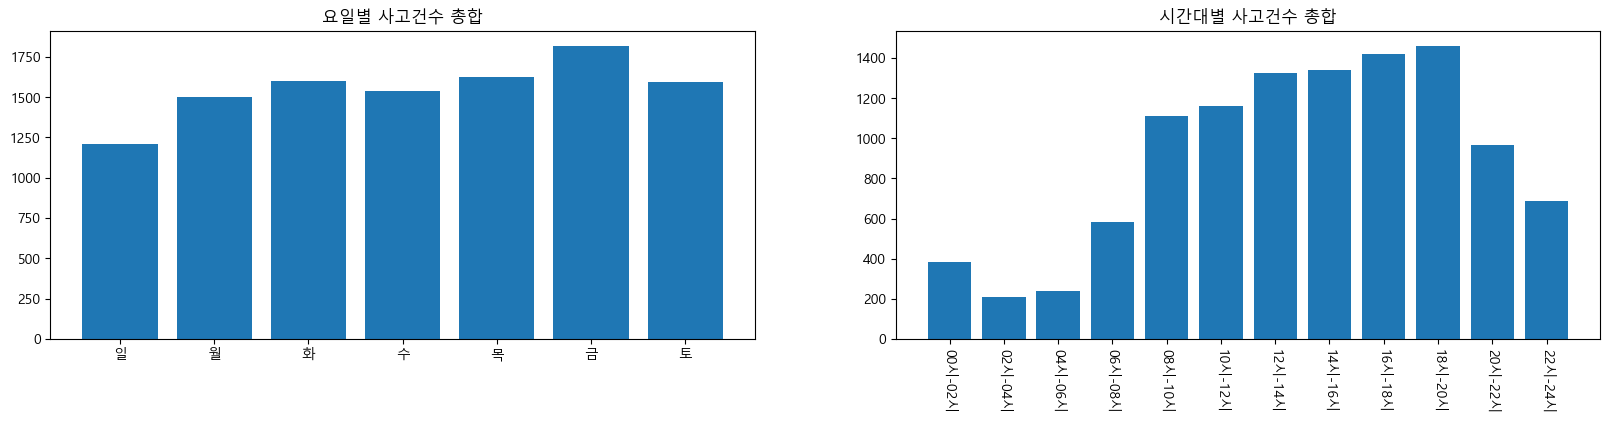

In [28]:
요일별_사고건수=pd.read_excel('./data/부산_수집데이터/요일별 교통사고 현황_busan.xlsx')
시간대별_사고건수=pd.read_excel('./data/부산_수집데이터/시간별 교통사고 현황_busan.xlsx')

요일별_사고건수=요일별_사고건수.drop(7)
요일별_사고건수

시간대별_사고건수=시간대별_사고건수.drop(12)
시간대별_사고건수
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.bar(요일별_사고건수['사고요일'],요일별_사고건수['구분값'])     
plt.title('요일별 사고건수 총합')

plt.subplot(1, 2, 2)
plt.bar(시간대별_사고건수['사고시간'],시간대별_사고건수['합계'])
plt.xticks(rotation=270)    
plt.title('시간대별 사고건수 총합')

plt.show()
